**1. Data Label conversion**

In [34]:
import pandas as pd

# Read train dataset from CSV
train_df = pd.read_csv("/content/Train_data.csv")

# Read test dataset from CSV
test_df = pd.read_csv("/content/test_data.csv")

# Mapping of disease names to binary labels
disease_mapping = {
    'Diabetes': 1,
    'Thalasse': 1,
    'Anemia': 1,
    'Thromboc': 1,
    'Heart Di':1,
    'Healthy': 0
}

def convert_to_binary_labels(data):
    data['Disease'] = data['Disease'].map(disease_mapping)
    return data

# Convert train dataset
train_df = convert_to_binary_labels(train_df)

# Convert test dataset
test_df = convert_to_binary_labels(test_df)

# Save the modified datasets back to CSV
train_df.to_csv("traindata_binary.csv", index=False)
test_df.to_csv("testdata_binary.csv", index=False)

print("Train data converted and saved to 'traindata_binary.csv'")
print("Test data converted and saved to 'testdata_binary.csv'")


Train data converted and saved to 'traindata_binary.csv'
Test data converted and saved to 'testdata_binary.csv'


**EDA**

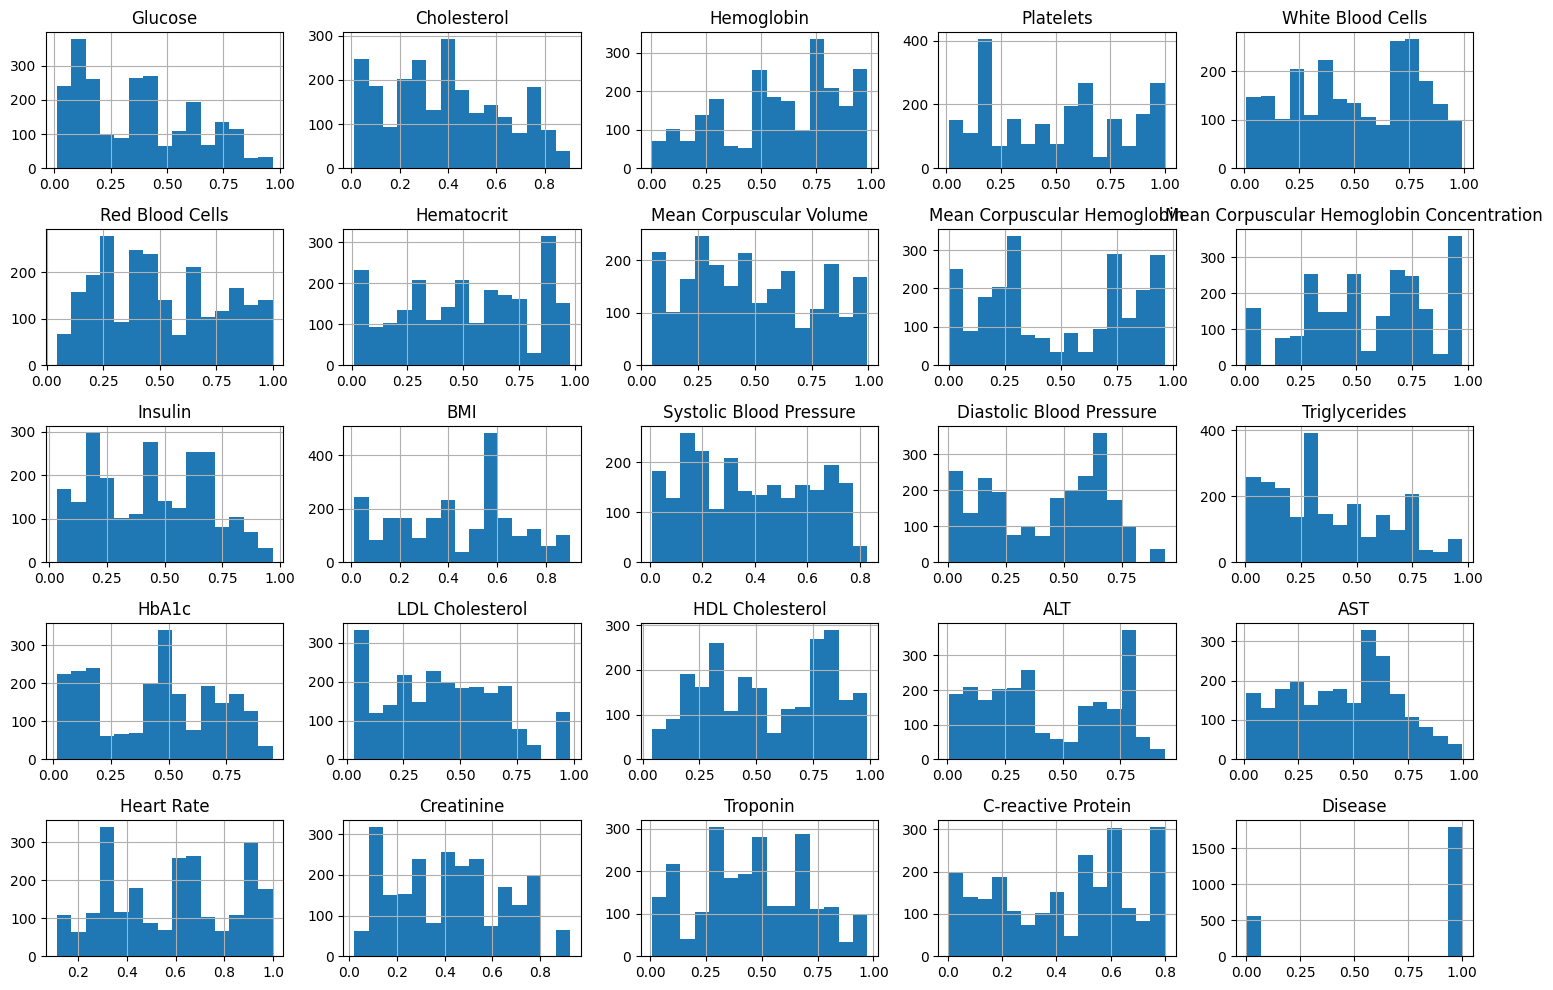

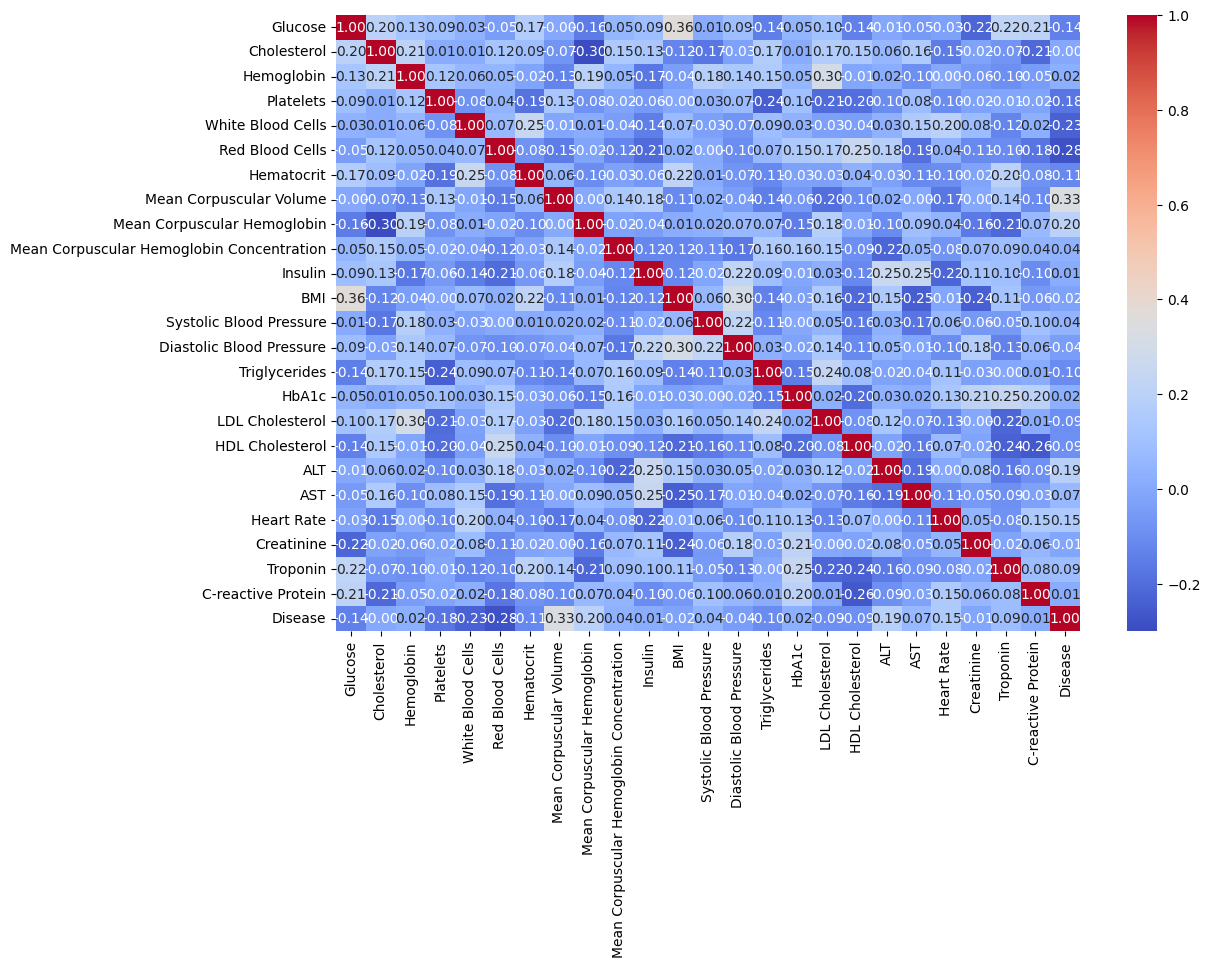

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature in the training set
train_df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plot correlation heatmap for the training set (excluding the target column)
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

**Model- RandomForest Classifier**

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the preprocessed datasets
train_df = pd.read_csv("traindata_binary.csv")
test_df = pd.read_csv("testdata_binary.csv")

# Split the data into features (X) and target variable (y)
X_train = train_df.drop(columns=['Disease'])
y_train = train_df['Disease']

X_test = test_df.drop(columns=['Disease'])
y_test = test_df['Disease']

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Model Evaluation:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Model Evaluation:
Accuracy: 0.9382716049382716
Precision: 0.9934354485776805
Recall: 0.9438669438669439
F1 Score: 0.9680170575692963


**Label Encoding**

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels in the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the target labels in the test set
y_test_encoded = label_encoder.transform(y_test)


**Confusion matrix**

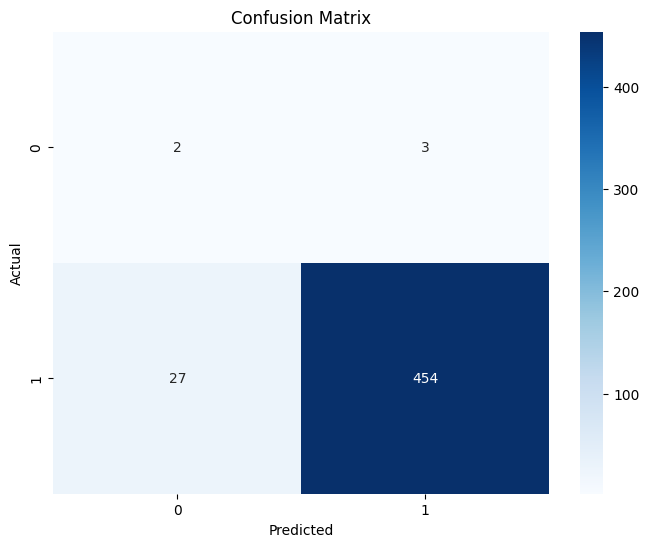

In [24]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Model - SVM**

In [27]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)  # Using a linear kernel for simplicity
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Model Evaluation:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Model Evaluation:
Accuracy: 0.6707818930041153
Precision: 0.9938461538461538
Recall: 0.6715176715176715
F1 Score: 0.8014888337468982


**Confusion Matrix**

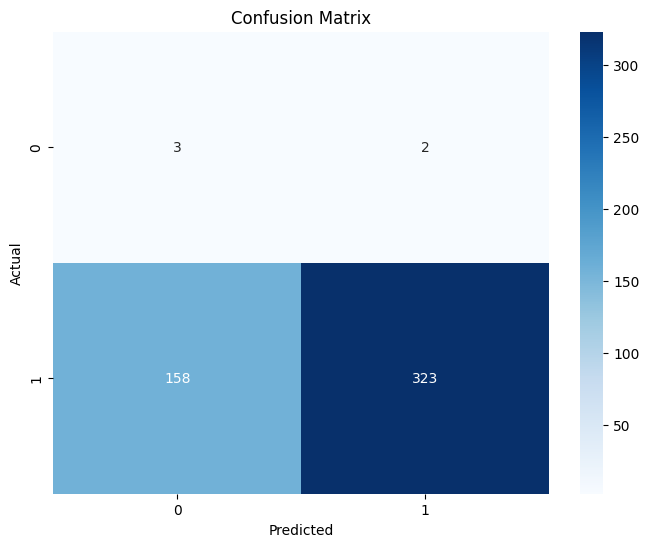

In [28]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Model - Gradient Boosting Classifier**



In [30]:

from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("Gradient Boosting Classifier Evaluation:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)


Gradient Boosting Classifier Evaluation:
Accuracy: 0.8703703703703703
Precision: 0.995260663507109
Recall: 0.8731808731808732
F1 Score: 0.9302325581395349


**Confusion matrix**

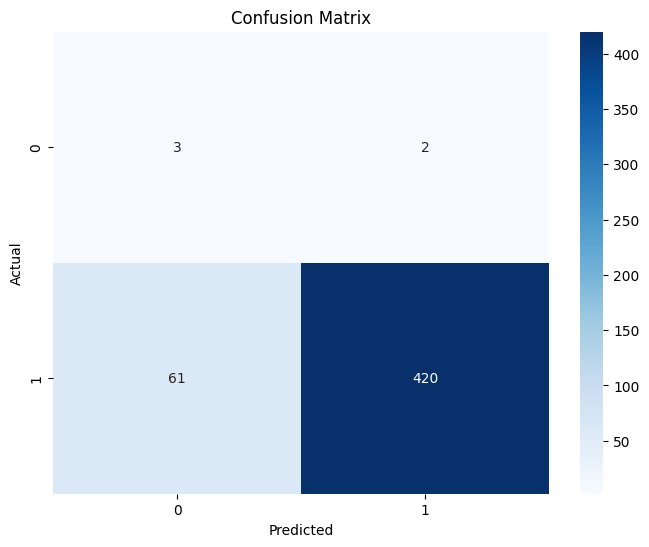

In [31]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Model - Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid to search
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Range of regularization parameters
    'penalty': ['l1', 'l2']  # Regularization penalty
}

# Initialize Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42)

# Initialize RandomizedSearchCV
lr_random_search = RandomizedSearchCV(estimator=lr_classifier, param_distributions=param_grid, n_iter=50, cv=3, random_state=42, n_jobs=-1)

# Perform RandomizedSearchCV
lr_random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_lr_model = lr_random_search.best_estimator_

# Predictions on the test set
y_pred_lr = best_lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Classifier Evaluation:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.

Logistic Regression Classifier Evaluation:
Accuracy: 0.6790123456790124
Precision: 0.9969418960244648
Recall: 0.6777546777546778
F1 Score: 0.8069306930693069


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
